In [133]:
#!pip install pandas # remove the hash if you need to install pandas
import pandas as pd  #importing pandas to work with our data as a dataframe
#"C:\Users\chags\Downloads\ac_watch.xlsx"
df = pd.read_excel("C:/Users/chags/Downloads/tj_watch.xlsx") #read in excel with only mims data, use read_csv to read in csv file
df #show the data frame

,sample,time,x,y,z,sumsq,vm
0,534,2022-02-16 13:25:41.172,396.187200,1195.348600,646.027200,2.003174e+06,1415.335196
1,535,2022-02-16 13:26:41.195,472.075740,211.715790,182.445760,3.009655e+05,548.603259
2,535,2022-02-16 13:27:41.255,1282.833300,1475.869100,3034.773000,1.303370e+07,3610.221328
3,535,2022-02-16 13:28:41.322,725.151600,937.863800,894.931800,2.206336e+06,1485.374120
4,535,2022-02-16 13:29:41.369,883.836000,974.864600,821.937800,2.407109e+06,1551.486001
...,...,...,...,...,...,...,...
144,535,2022-02-16 14:54:45.992,13.791843,13.056362,12.040449,5.056559e+02,22.486795
145,535,2022-02-16 14:55:46.047,13.453268,12.148547,11.995439,4.724682e+02,21.736333
146,535,2022-02-16 14:56:46.106,13.617699,12.818045,10.898737,4.685265e+02,21.645472
147,535,2022-02-16 14:57:46.169,13.511672,12.882248,11.463123,4.799208e+02,21.907094


In [134]:
vm = df["vm"]

In [135]:
low_threshold = 3000 #set your low value threshold here
mv_threshold = 6000 #set your high value threshold here
s_threshold = 0 #set your time series threshold here #also known as bout

low = vm[s_threshold:] = vm[s_threshold:] > low_threshold 
mv = vm[s_threshold:] = vm[s_threshold:] > mv_threshold 

<ipython-input-135-41da57a75ec6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low = vm[s_threshold:] = vm[s_threshold:] > low_threshold
C:\Users\chags\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [136]:
mod_act_filt = pd.DataFrame() 
mod_act_filt["Low Threshold"] = low
mod_act_filt["MV Threshold"] = mv

In [137]:
mod_act_filt #show our output

,Low Threshold,MV Threshold
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
144,False,False
145,False,False
146,False,False
147,False,False


In [138]:
mod_act_filt = mod_act_filt.astype(int) #transform true/false to 1/0

In [139]:
mod_act_filt #view the data as 1/0s

,Low Threshold,MV Threshold
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
144,0,0
145,0,0
146,0,0
147,0,0


<AxesSubplot:>

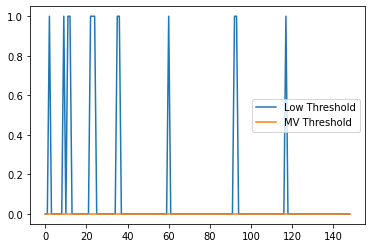

In [140]:
mod_act_filt.plot.line()

In [141]:
N = 60
hours = mod_act_filt.groupby(mod_act_filt.index // N).sum()

<AxesSubplot:xlabel='Time - Hours', ylabel='# of Minutes of PA Above Threshold'>

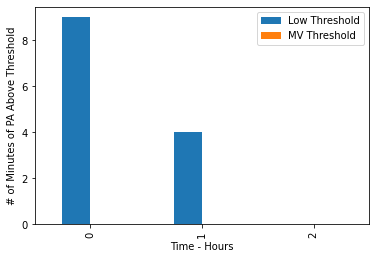

In [142]:
hours.plot.bar(xlabel="Time - Hours", ylabel="# of Minutes of PA Above Threshold")